# Pandas Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

Matplotlib comes with a number of predefined styles,
which we can choose from, to change the default look of our plots. 

In [3]:
# see the pre-defined styles provided.
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

Let's use the seaborn-colorblind style, which will change the default colors of
our plots to use a color palette that is more color vision deficiency friendly. 

In [4]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

Now, where the built-in visualization of pandas really shines is in
helping with fast and easy plotting of series and
DataFrames that can help us explore the data.
Let's make a DataFrame.
First, we'll set the seed for
the random number generator, which will allow us to reproduce the data.
Next, let's add three columns of random time series data. We can generate the random data by cumulatively summing up random numbers. numpy has a great function for this called cumsum, which cumulatively sums an array 

In [5]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


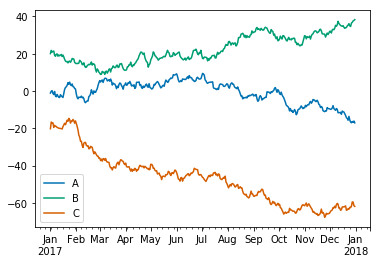

In [10]:
df.plot(); # add a semi-colon to the end of the plotting call 
          # to suppress unwanted output like <matplotlib.axes._subplots.AxesSubplot at 0x1108e2d68>

We can select which plot we want to use by passing it into the 'kind' parameter.

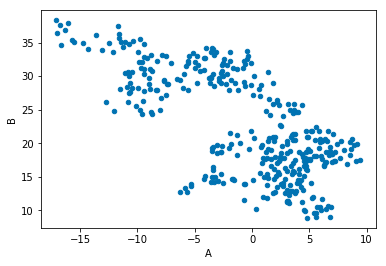

In [11]:
df.plot('A','B', kind = 'scatter'); # We pass in scatter to the kind parameter to change the plot type. 

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


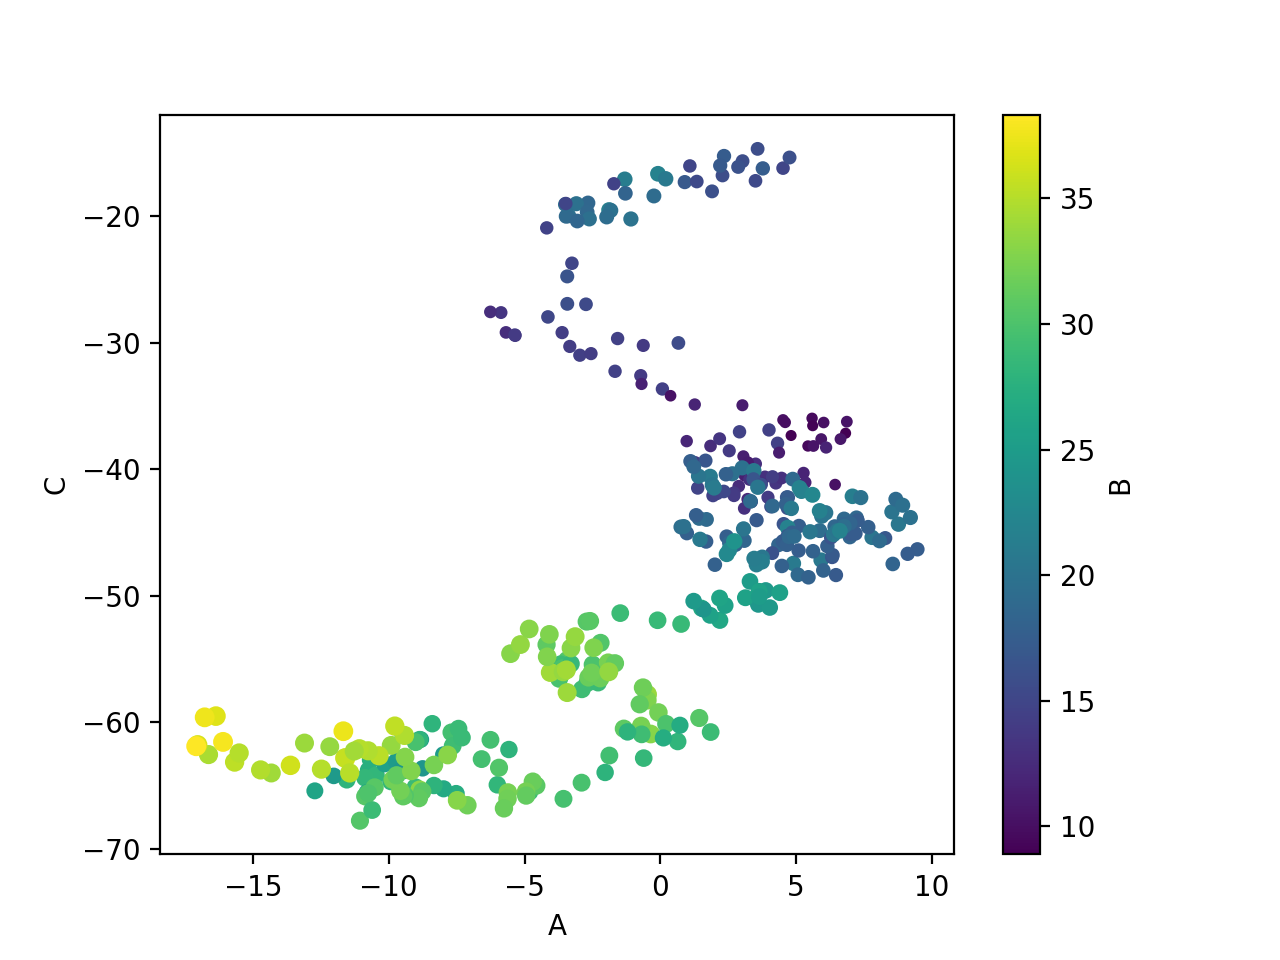

In [28]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis');

Setting the aspect ratio to equal allows the viewer to easily see that the range of
series A is much smaller than series C. 

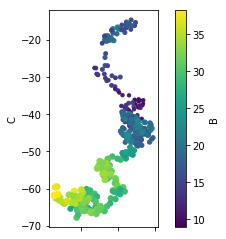

In [12]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis');
ax.set_aspect('equal') 

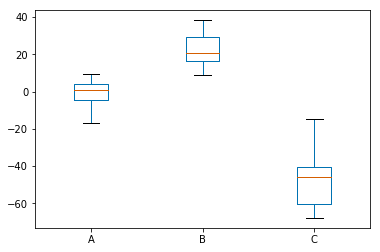

In [13]:
df.plot.box();

<IPython.core.display.Javascript object>


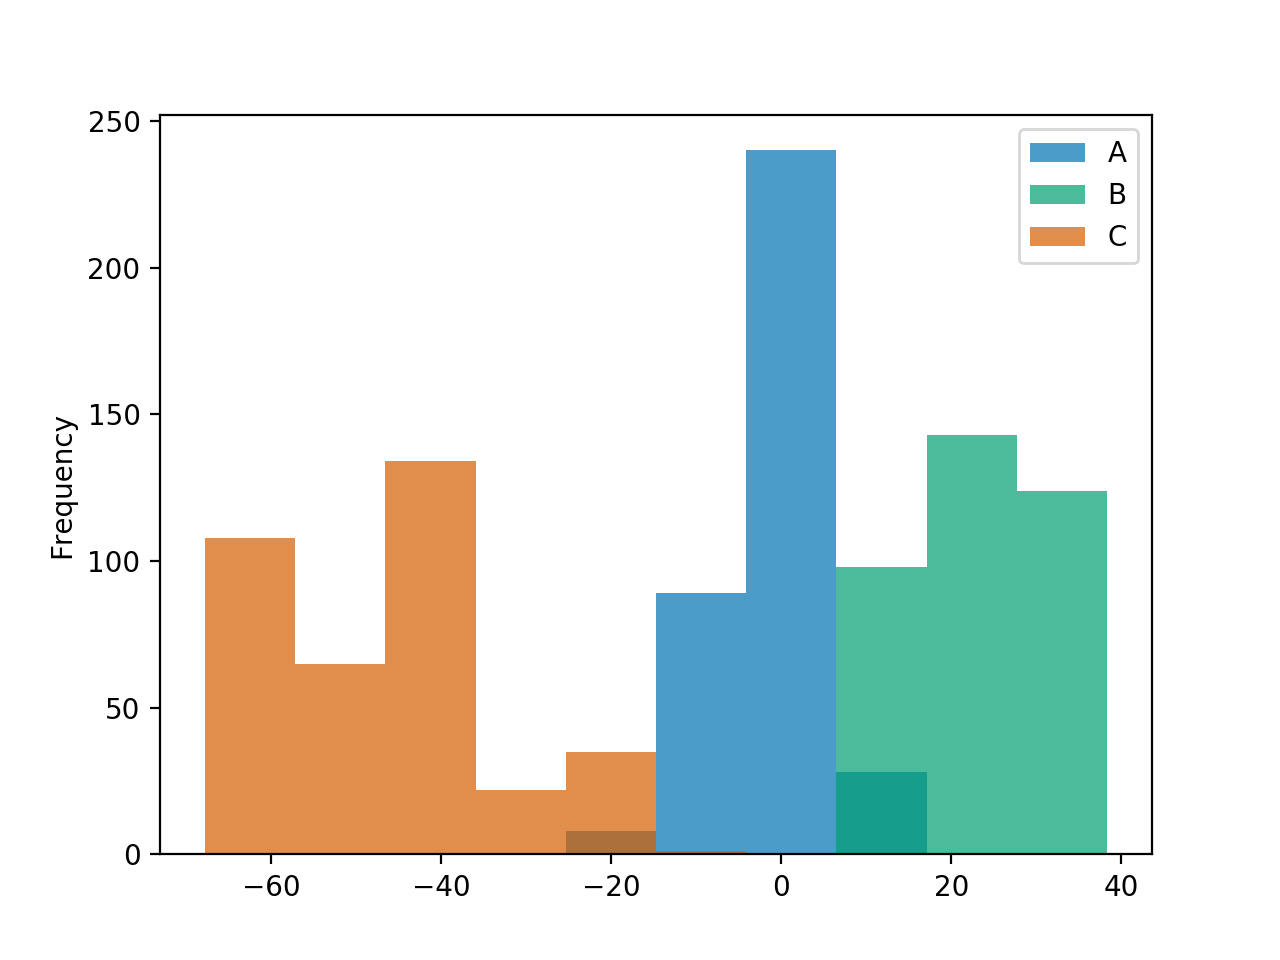

In [10]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


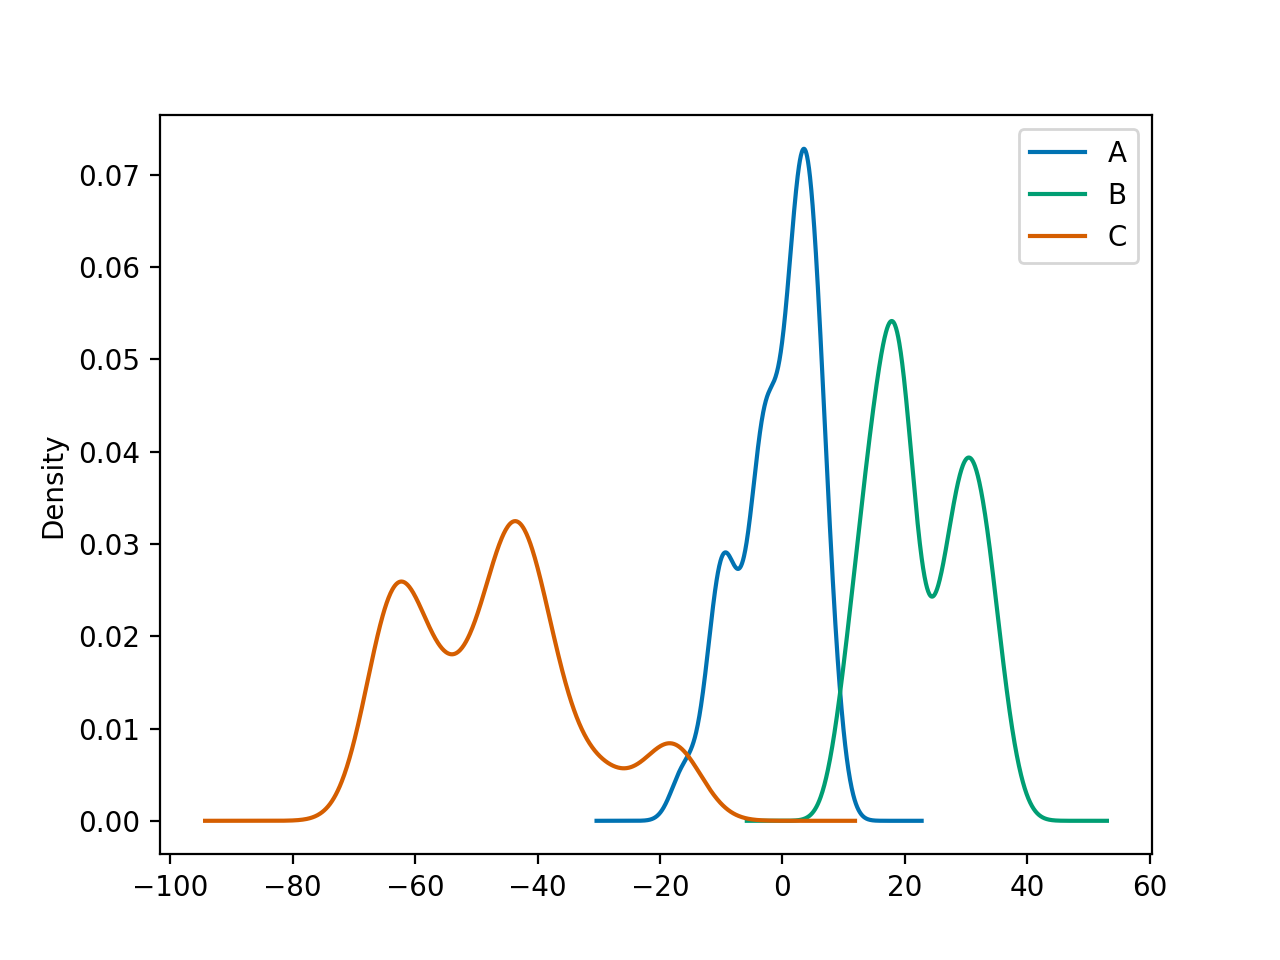

In [29]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head(5)

FileNotFoundError: [Errno 2] File iris.csv does not exist: 'iris.csv'

The scatter matrix creates scatter plots between the different variables and
histograms along the diagonals 

<IPython.core.display.Javascript object>


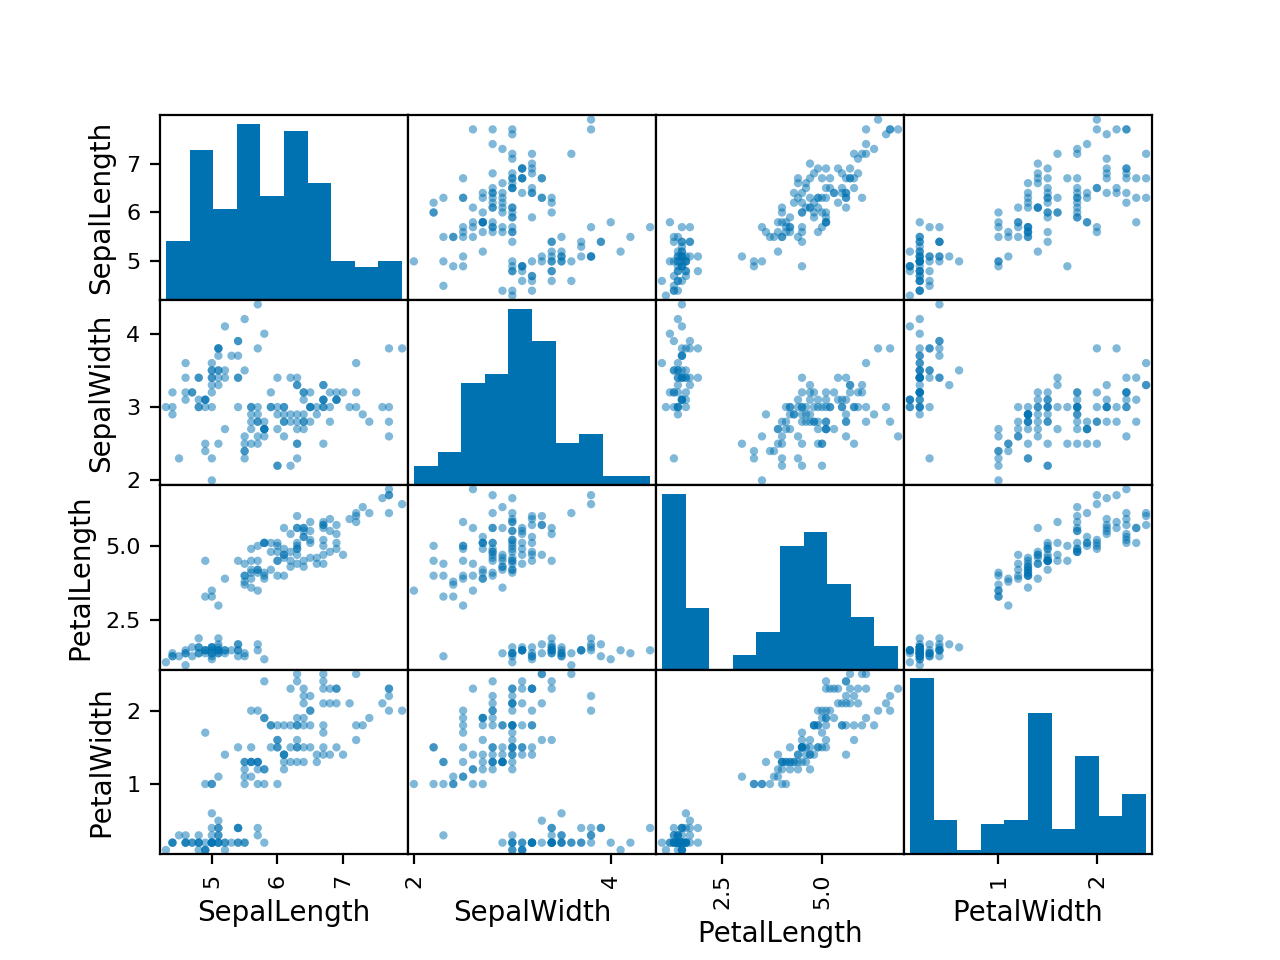

In [33]:
pd.plotting.scatter_matrix(iris);

pandas includes a plotting tool for creating parallel coordinates plots.
Parallel coordinate plots are a common way of visualizing high dimensional multivariate data.
Each variable in the data set corresponds to an equally
spaced parallel vertical line.
The values of each variable are then connected by lines between for
each individual observation.
Coloring the lines by class, in this example the species of flower,
allows the viewer to more easily see any patterns or clustering.
For instance, looking at our iris data set, we can see that the petal length and
petal width are two variables that split the different species fairly clearly.
With iris virginica having the longest and widest petals.
And iris setosa having the shortest and narrowest petals.


<IPython.core.display.Javascript object>


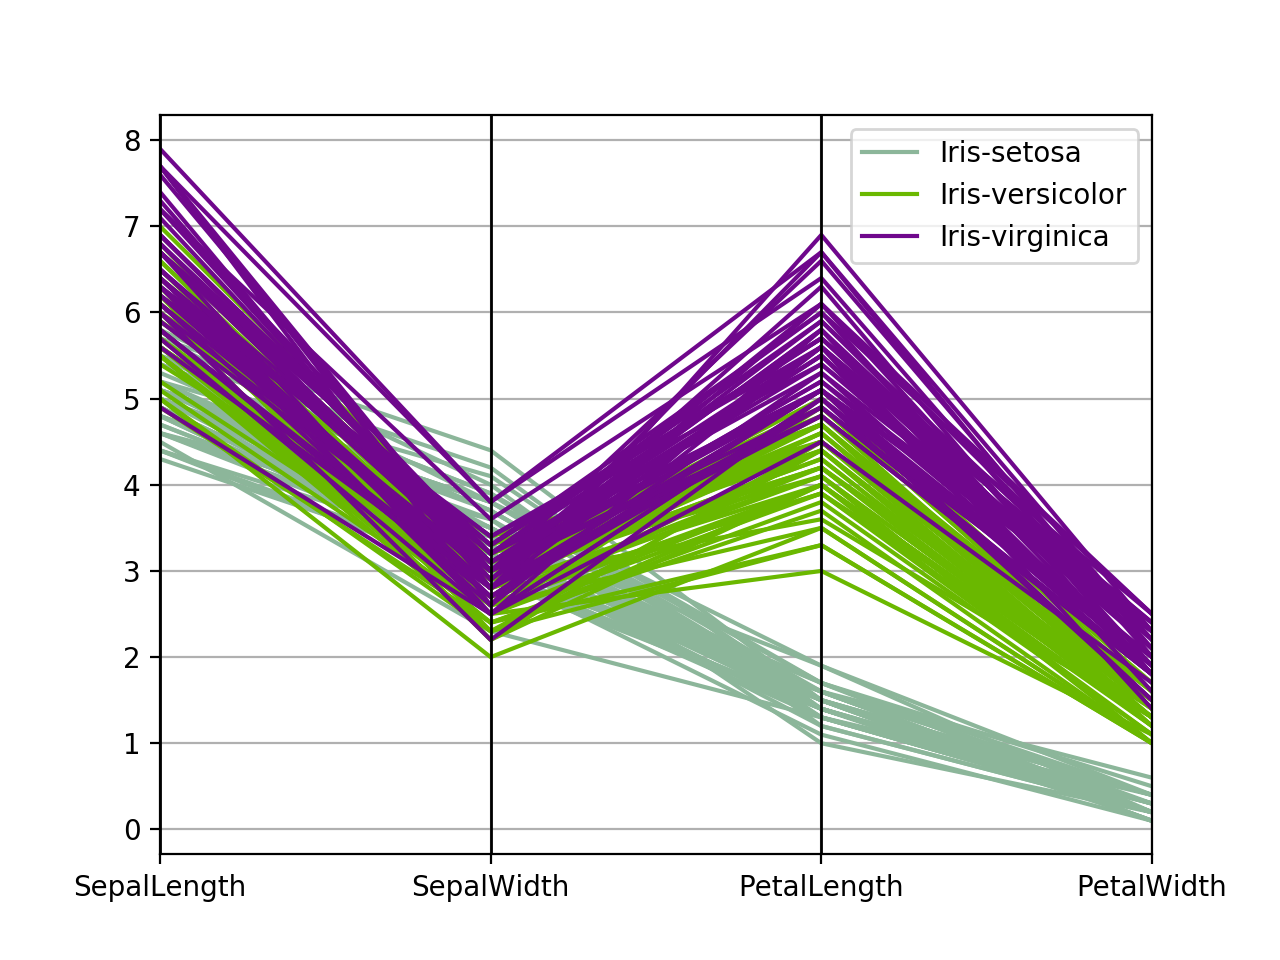

In [36]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

Seaborn is really just a wraparound matplotlib.
It adds styles to make default data visualizations much more visually
appealing and makes creation of specific types of complicated plots much simpler

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [38]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


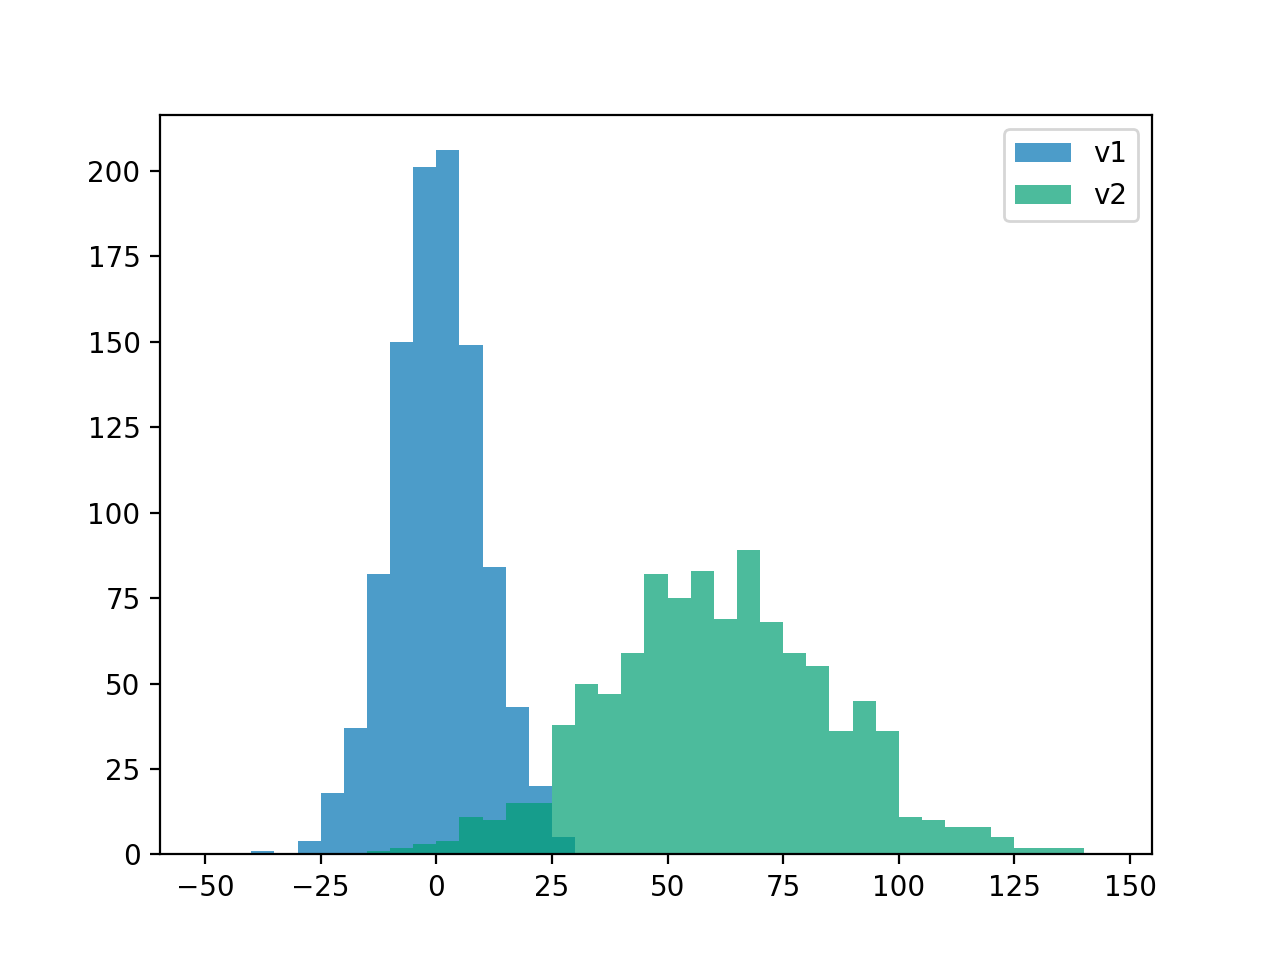

In [39]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

use v3 to plot a kernel density estimate plot over the stacked histogram.
The kernel density estimation plot estimates the probability density
function of the variable v3.
Plotting it on top of the stacked histograms of v1 and
v2 allows us to see the relationship between these two visualizations

In [41]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


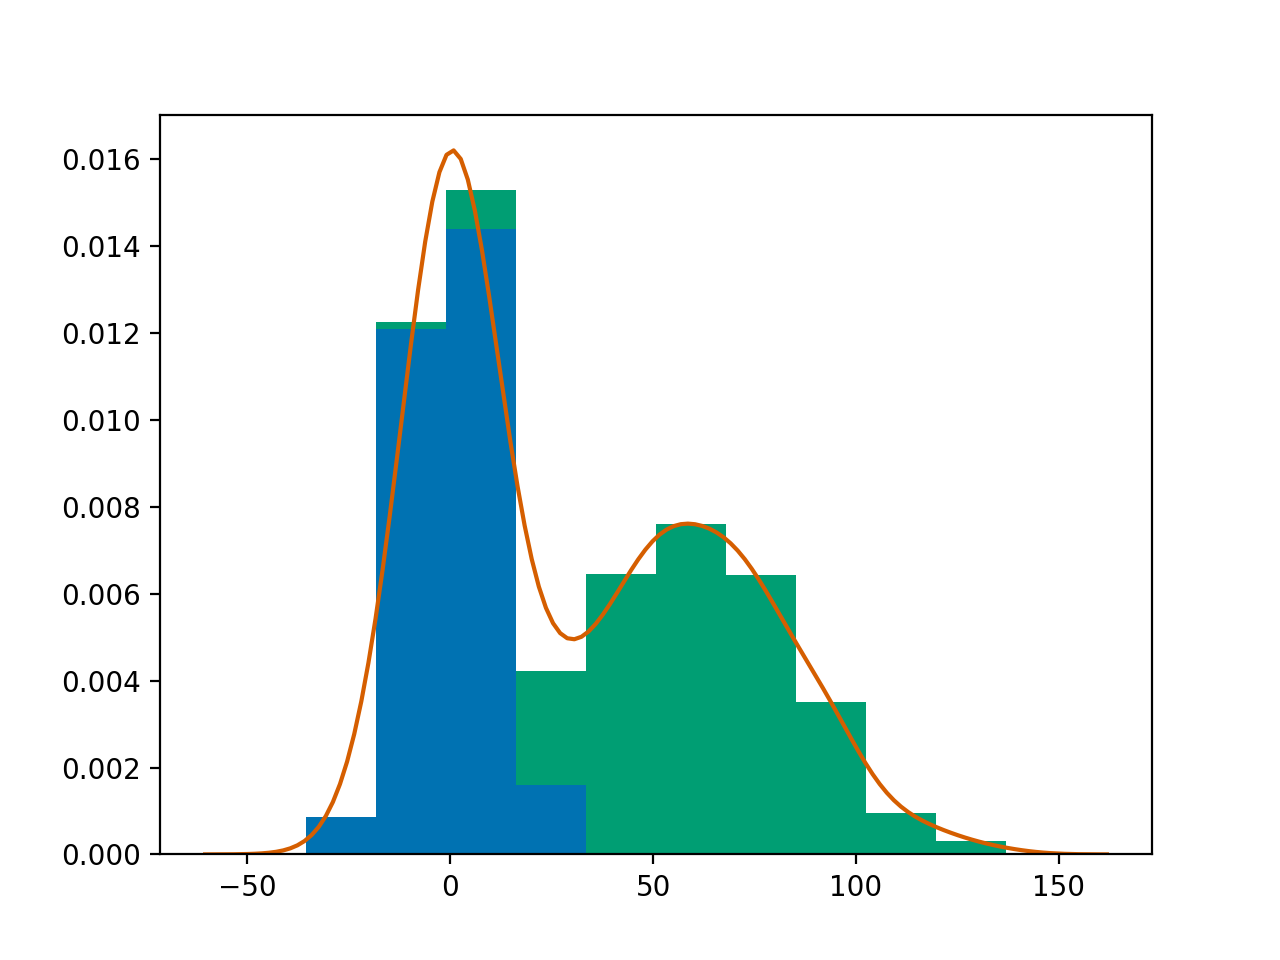

In [42]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

Setting alpha to 0.4 will help with visualizing overlapping points.
The jointplot allows us to visualize the distribution of the two variables
individually. As well as relationships between the variables.
Using jointplot we can see that v1 and
v2 appear to be normally distributed variables that are positively correlated.
Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools

<IPython.core.display.Javascript object>


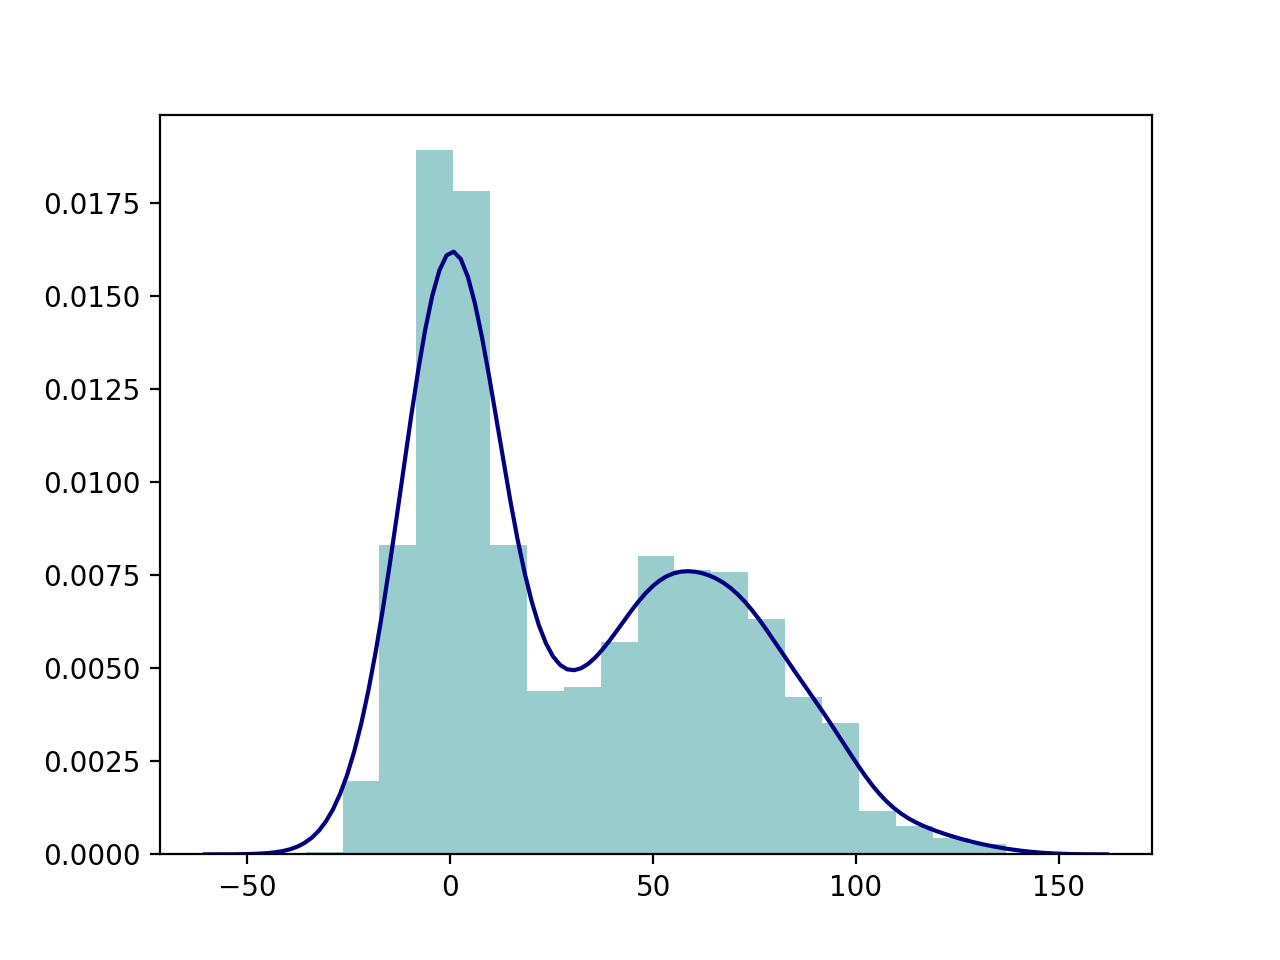

In [43]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


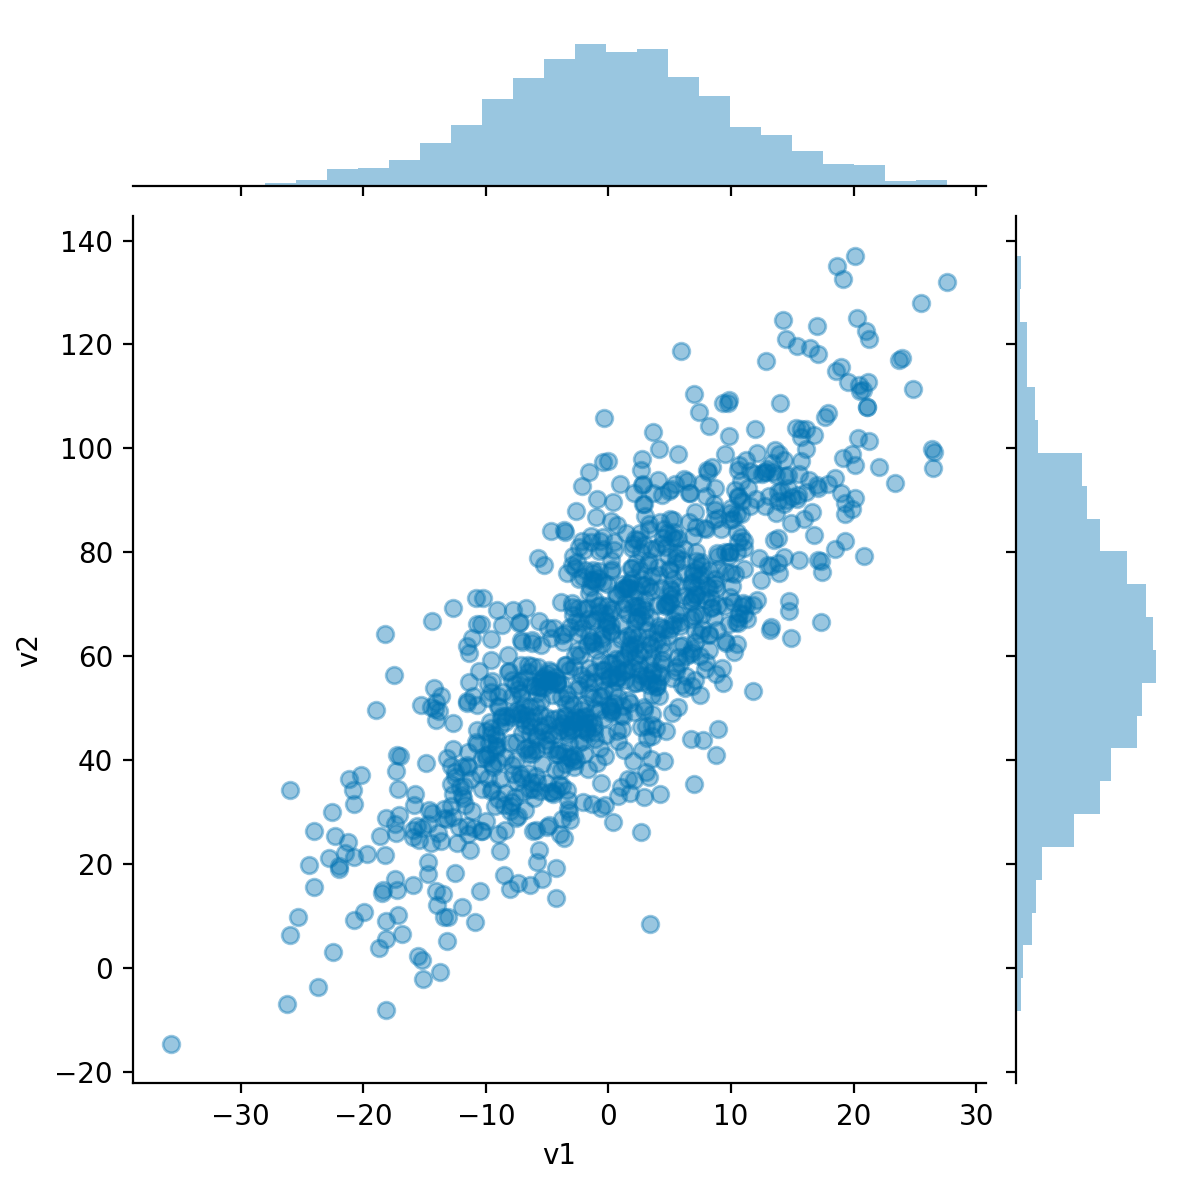

In [44]:
sns.jointplot(v1, v2, alpha=0.4);

Setting the aspect to equal show the distribution in perspective

<IPython.core.display.Javascript object>


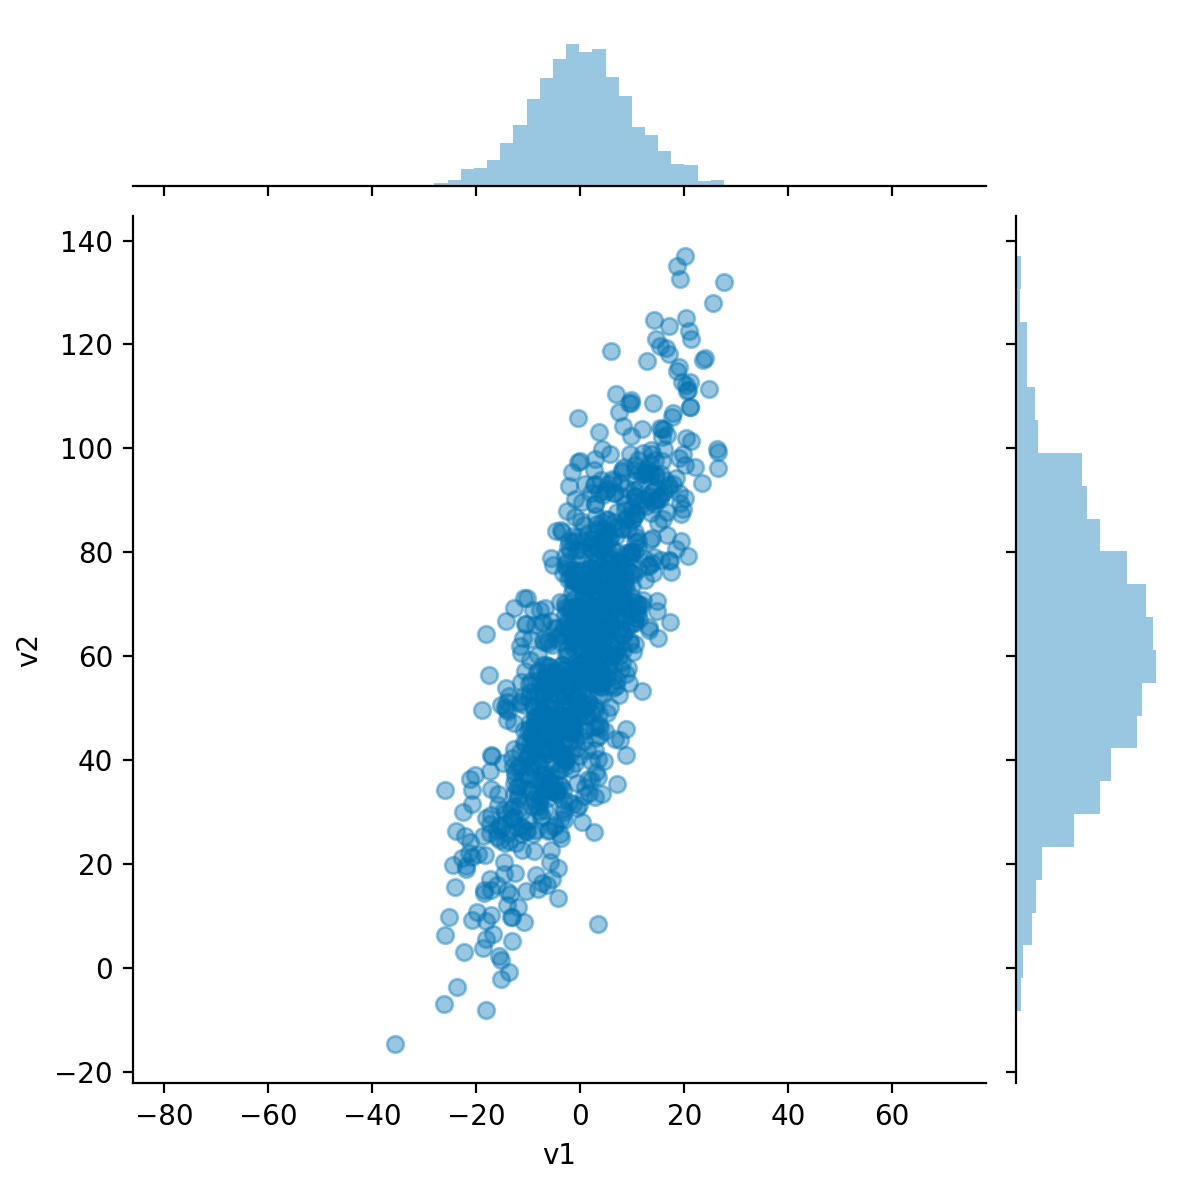

In [45]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


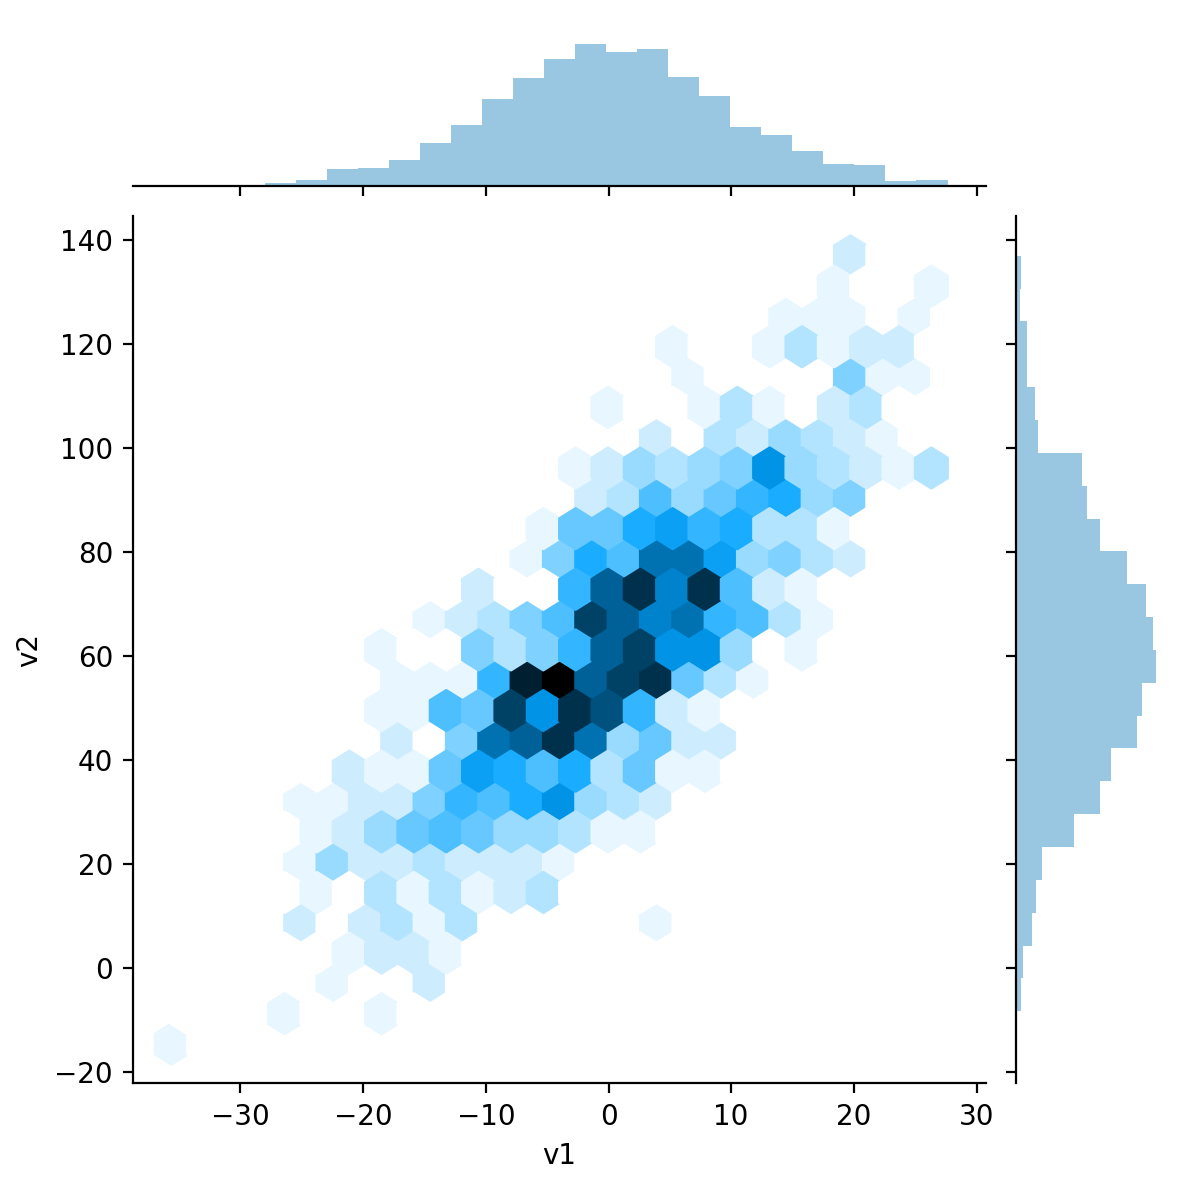

In [46]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


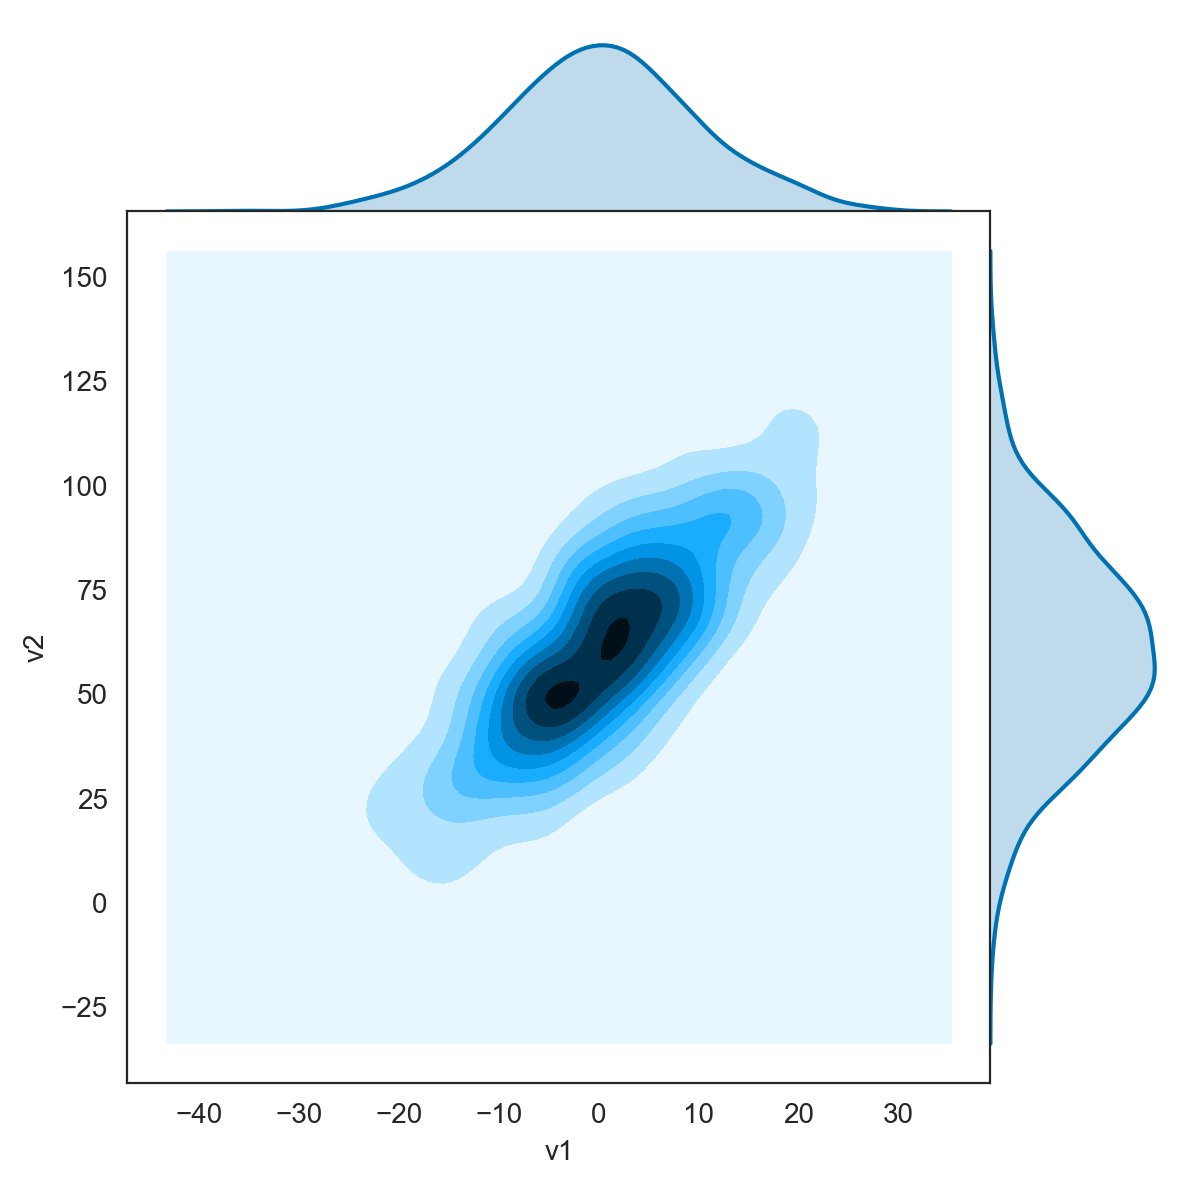

In [47]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

## Visualisation categorical data

In [48]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


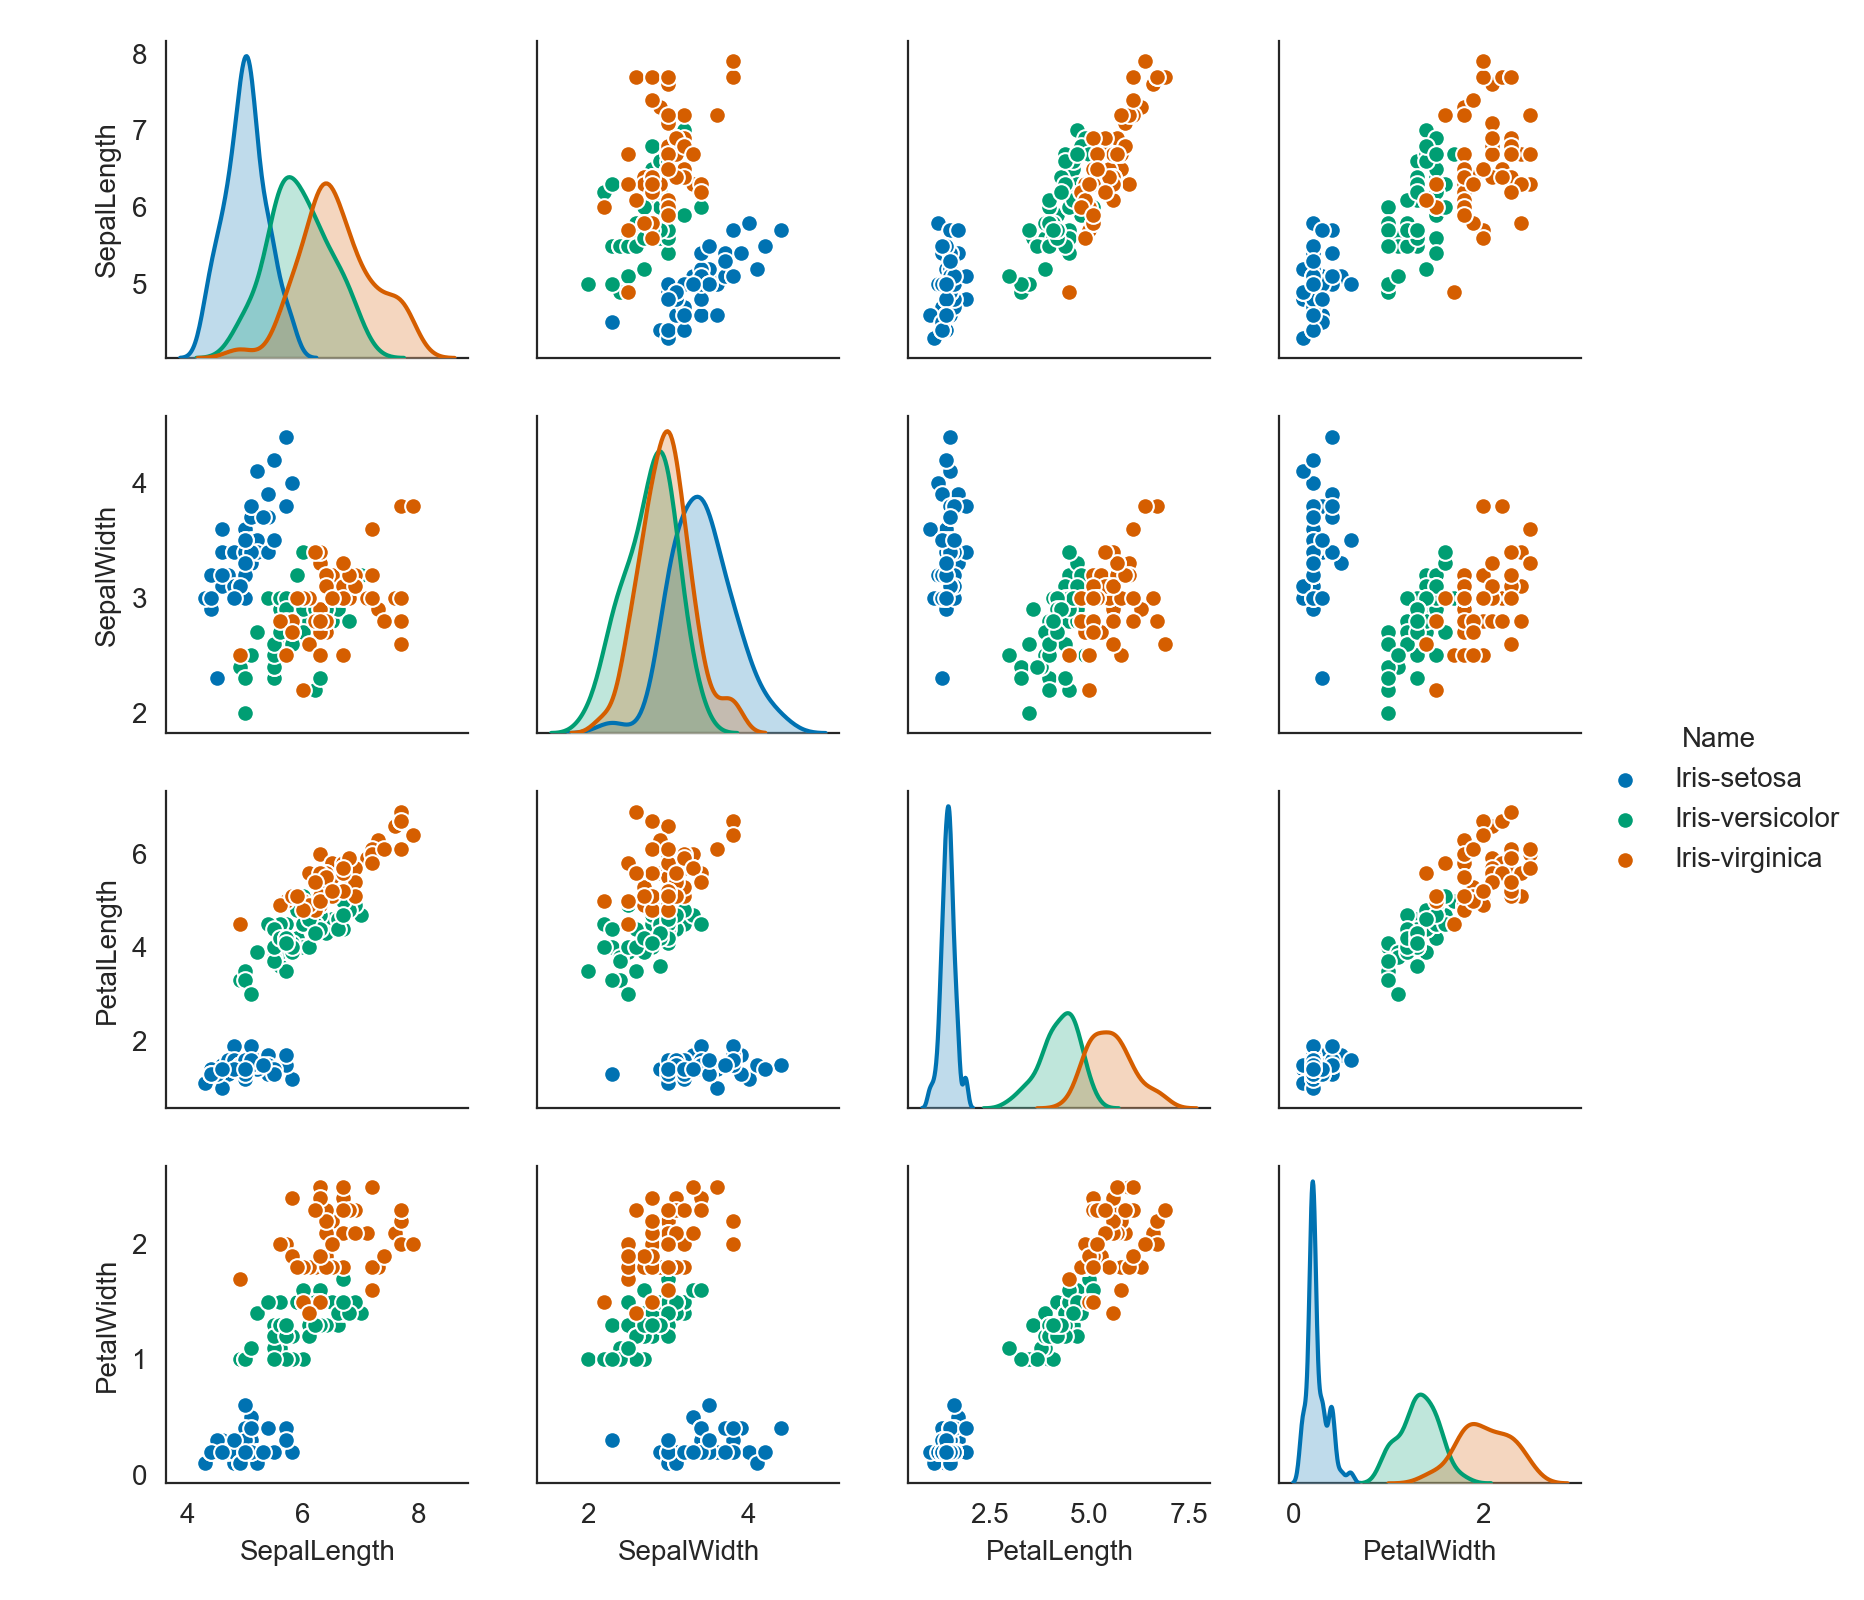

In [49]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

Looking at the pair plot, it's clear there are some clusters in the data set.
It looks like peddle length and peddle width are good options for
separating the observations, whereas width is not a strong separator. 

<IPython.core.display.Javascript object>


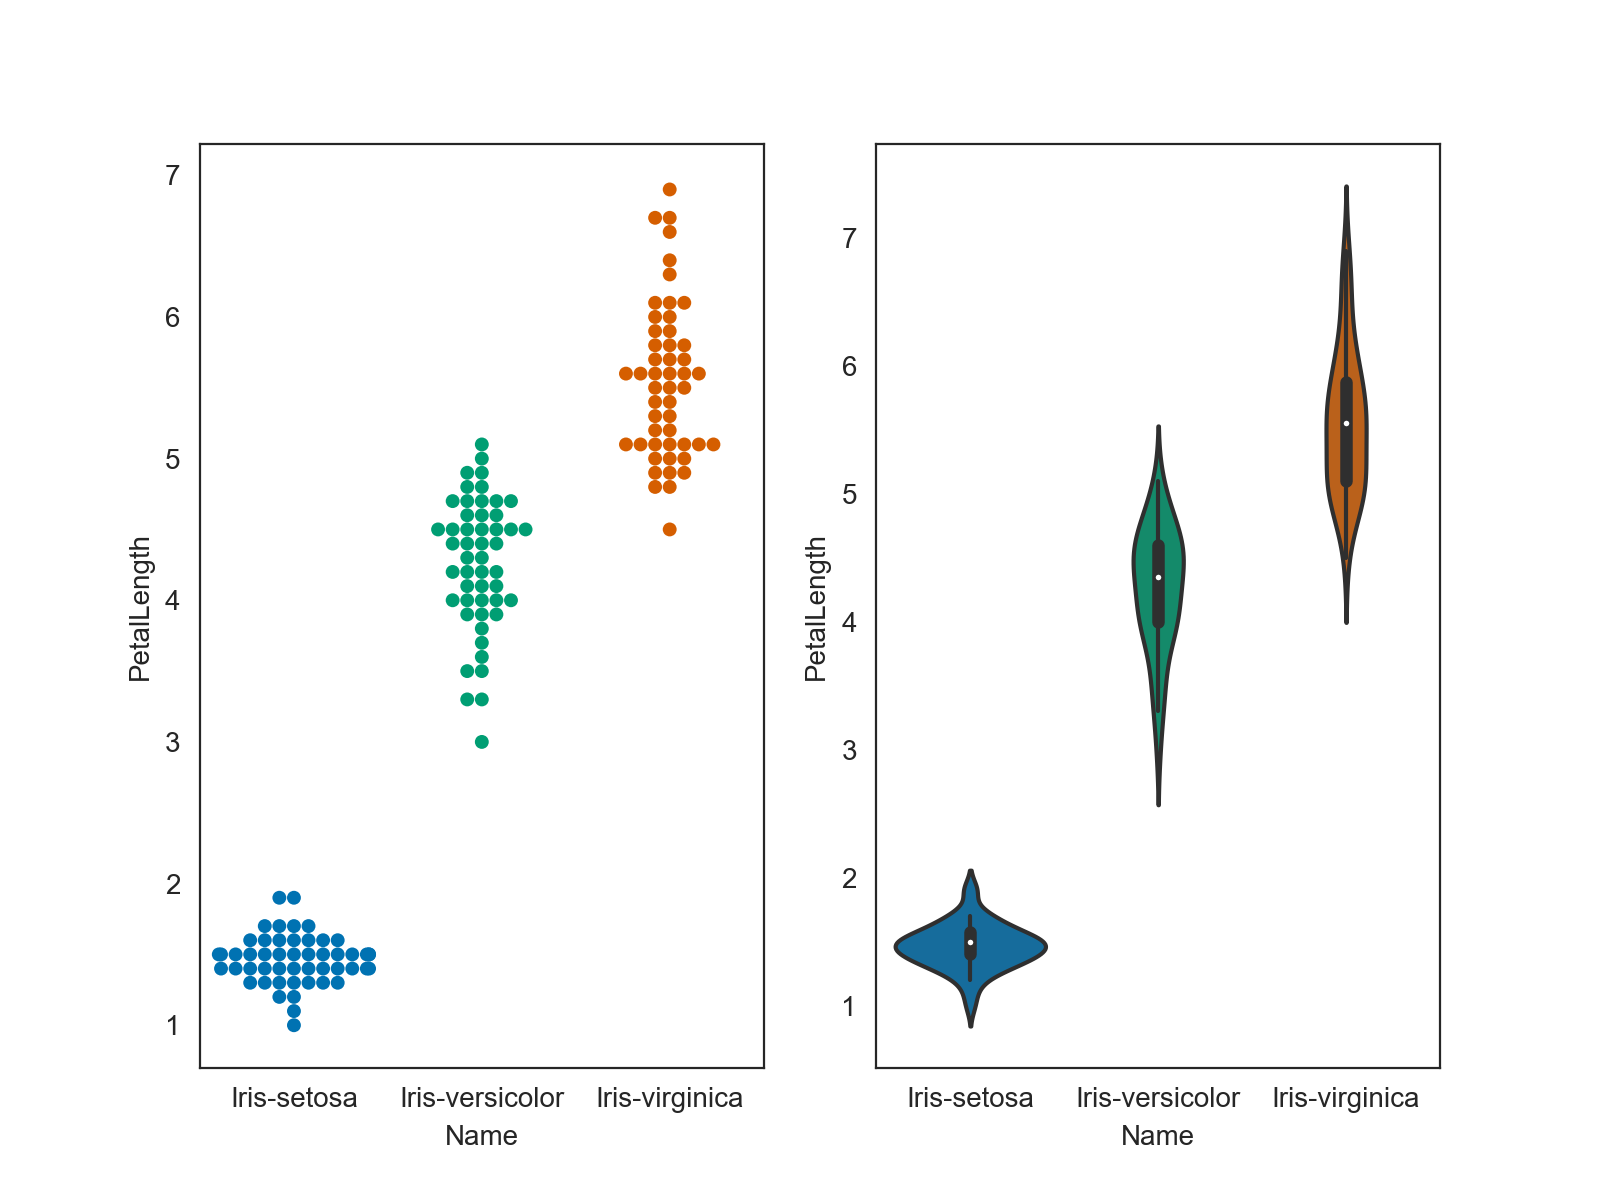

In [50]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

Looking at the swarmplot, each species has its own column and
each observation's petal length is shown.
With more common values appearing as the wide parts of the cluster,
much like a histogram.
The violinplot is like box plot with a rotated kernel density estimation
on each side.
Violin plots convey more information than box plots and
are able to show particular phenomena within the distribution
that box plots are unable to convey such as multi modality.
Seaborn is a library that not only adds new styles and visual aspects.
But also introduces new functionality such as joint plots, scatter matrix plots, and
violin plots. 